# Classification Methods

## Data Science, Machine Learning and Artificial Intelligence - by Farzad Minooei

## Business Understanding 

Churn prediction for telecom industry

Churn refers to the situation where a customer of a company stops using its products or services and leaves the company.

### Initial Setups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read data from csv file
data = pd.read_csv('cs_06.csv')
data.head()

,id,call_failures,if_complain,subscription_length,charge_amount,seconds_of_calls,frequency_of_calls,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,if_churn
0,1,8,0,38,0,4370,71,5,17,3,1,1,0
1,2,0,0,39,0,318,5,7,4,2,1,2,0
2,3,10,0,37,0,2453,60,359,24,3,1,1,0
3,4,10,0,38,0,4198,66,1,35,1,1,1,0
4,5,3,0,38,0,2393,58,2,33,1,1,1,0


In [3]:
data.shape

(3150, 13)

## Data Understanding

#### 1: Understand data collection process

Data gathered from an Iranian telecom company over a 12-month period (from September 2006 to September 2007)

Call Detail Record (CDR) + CRM data base

#### 2: Document data set description (meta data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       3150 non-null   int64
 1   call_failures            3150 non-null   int64
 2   if_complain              3150 non-null   int64
 3   subscription_length      3150 non-null   int64
 4   charge_amount            3150 non-null   int64
 5   seconds_of_calls         3150 non-null   int64
 6   frequency_of_calls       3150 non-null   int64
 7   frequency_of_sms         3150 non-null   int64
 8   distinct_called_numbers  3150 non-null   int64
 9   age_group                3150 non-null   int64
 10  tariff_plan              3150 non-null   int64
 11  status                   3150 non-null   int64
 12  if_churn                 3150 non-null   int64
dtypes: int64(13)
memory usage: 320.1 KB


0 id: customer idification

1 call_failures: number of call failures (numeric)

2 if_complain: 0: No complaint, 1: complaint (binary)

3 subscription_length: total months of subscription (numeric)

4 charge_amount: 0: lowest amount, 9: highest amount (ordinal)

5 seconds_of_calls: total seconds of calls (numeric)

6 frequency_of_calls: total number of calls (numeric)

7 frequency_of_sms: number of sent short messages (numeric)

8 distinct_called_numbers: total number of distinct phone calls (numeric)

9 age_group: 1: less than 15, 2: between 15 and 30, 3: between 30 and 45, 4: between 45 and 60, 
5: between 60 and 75 (ordinal)

10 tariff_plan: 1: Pay as you go, 2: contractual (binary)

11 status: 1: active (customers who have not demonstrated inactive conditions)
2: non-active (customers who have not increased their account in two sequential months while having had less than 30 min worth of calls in the last month) (binary)

12 if_churn: if customer churns (i.e., sell or cedes SIM privilege to another person) (binary)

#### 3: Check for missing values

In [5]:
np.sum(data.isnull(), axis = 0)

id                         0
call_failures              0
if_complain                0
subscription_length        0
charge_amount              0
seconds_of_calls           0
frequency_of_calls         0
frequency_of_sms           0
distinct_called_numbers    0
age_group                  0
tariff_plan                0
status                     0
if_churn                   0
dtype: int64

#### 4: Univariate data analysis

In [6]:
#Check number of unique ids
data['id'].nunique()

3150

In [7]:
#Check if there is duplicate rows
np.sum(data.duplicated())

np.int64(0)

In [8]:
#Frequency table for response variable
data['if_churn'].value_counts(normalize = True)
#Class-imbalanced data

if_churn
0    0.842857
1    0.157143
Name: proportion, dtype: float64

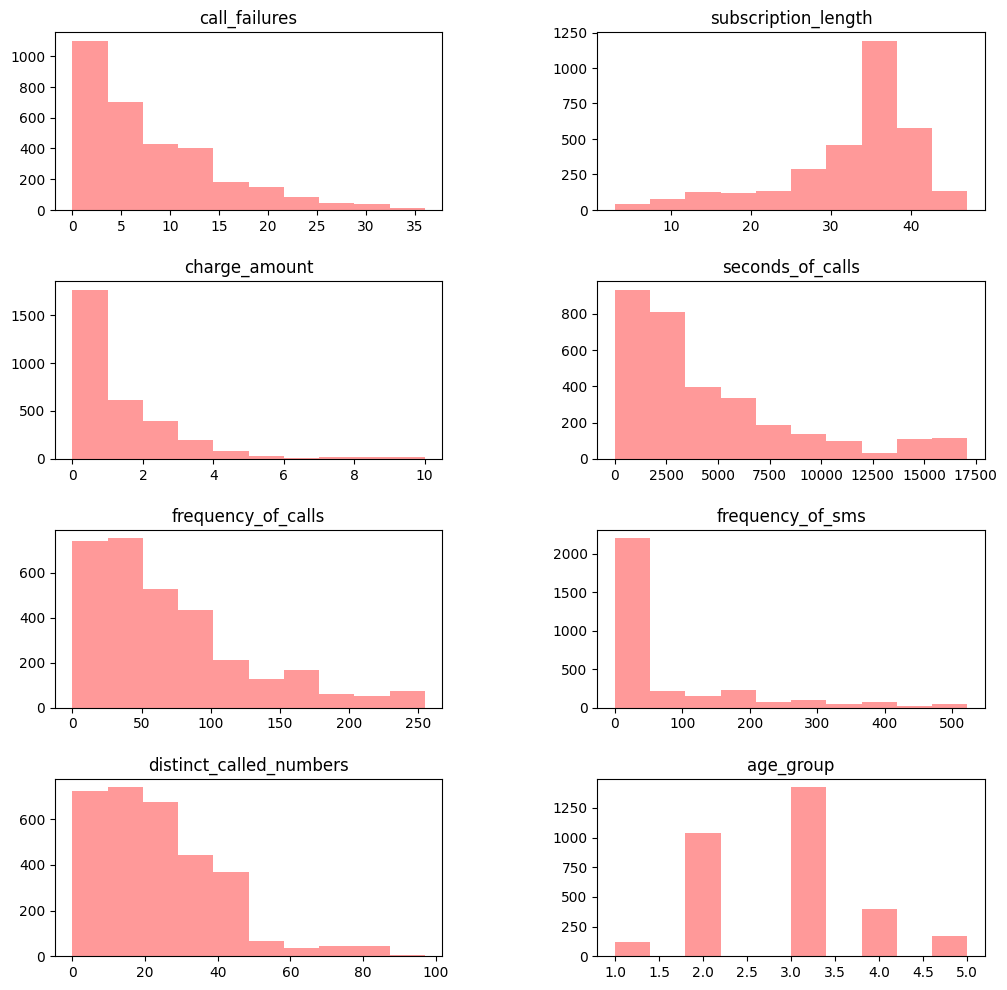

In [9]:
#Histogram of numeric variables
var_ind = [1, 3, 4, 5, 6, 7, 8, 9]
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 9):
    plt.subplot(4, 2, i)
    plt.hist(x = data.iloc[: , var_ind[i - 1]], alpha = 0.4, color = 'red')
    plt.title(data.columns[var_ind[i - 1]])

In [10]:
#Summary statistics of numeric variables
data.iloc[:, var_ind].describe()

,call_failures,subscription_length,charge_amount,seconds_of_calls,frequency_of_calls,frequency_of_sms,distinct_called_numbers,age_group
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032
std,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000
50%,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000
75%,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000
max,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000


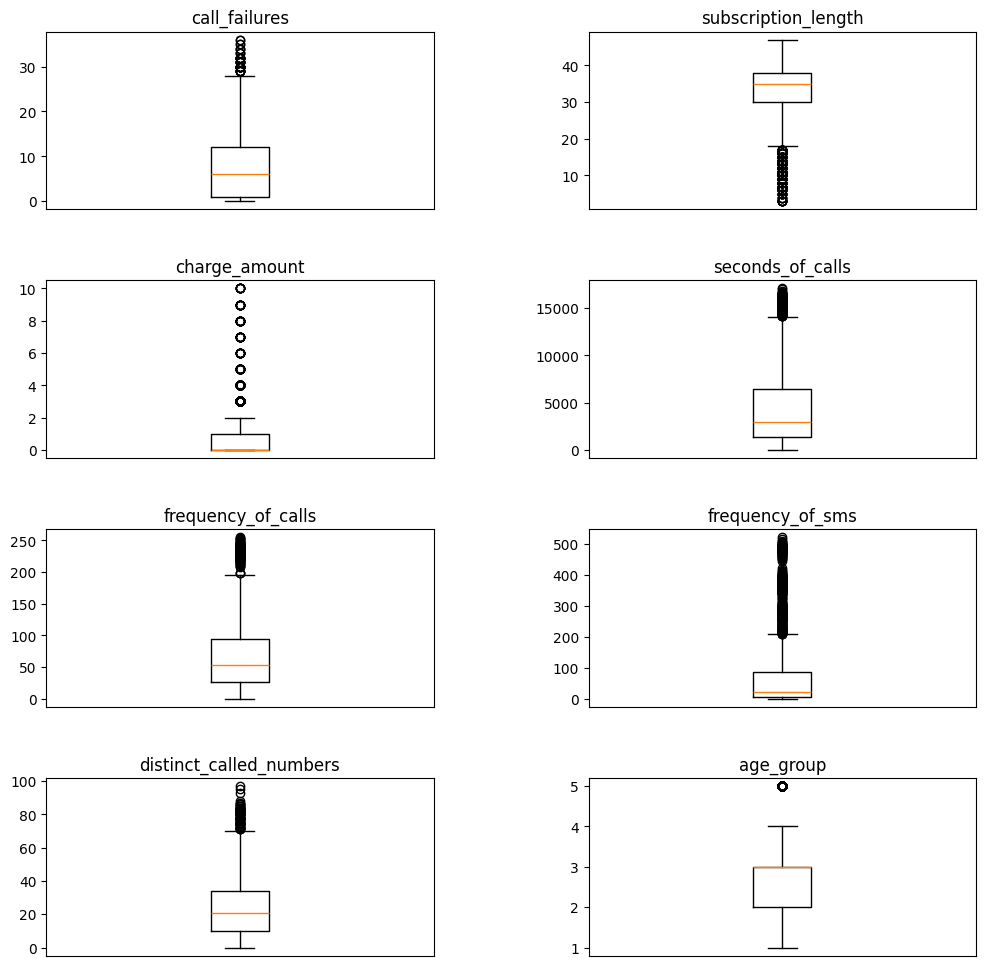

In [11]:
#Boxplot of numeric variables
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 9):
    plt.subplot(4, 2, i)
    plt.boxplot(data.iloc[: , var_ind[i - 1]])
    plt.xticks([]) #remove the xticks 
    plt.title(data.columns[var_ind[i - 1]])

In [12]:
#Frequency table for categorical variables
for i in ['if_complain', 'tariff_plan', 'status']:
    print('--- Frequency table for ' + i + ' ---')
    print(data[i].value_counts())

--- Frequency table for if_complain ---
if_complain
0    2909
1     241
Name: count, dtype: int64
--- Frequency table for tariff_plan ---
tariff_plan
1    2905
2     245
Name: count, dtype: int64
--- Frequency table for status ---
status
1    2368
2     782
Name: count, dtype: int64


#### 5: Bivariate data analysis

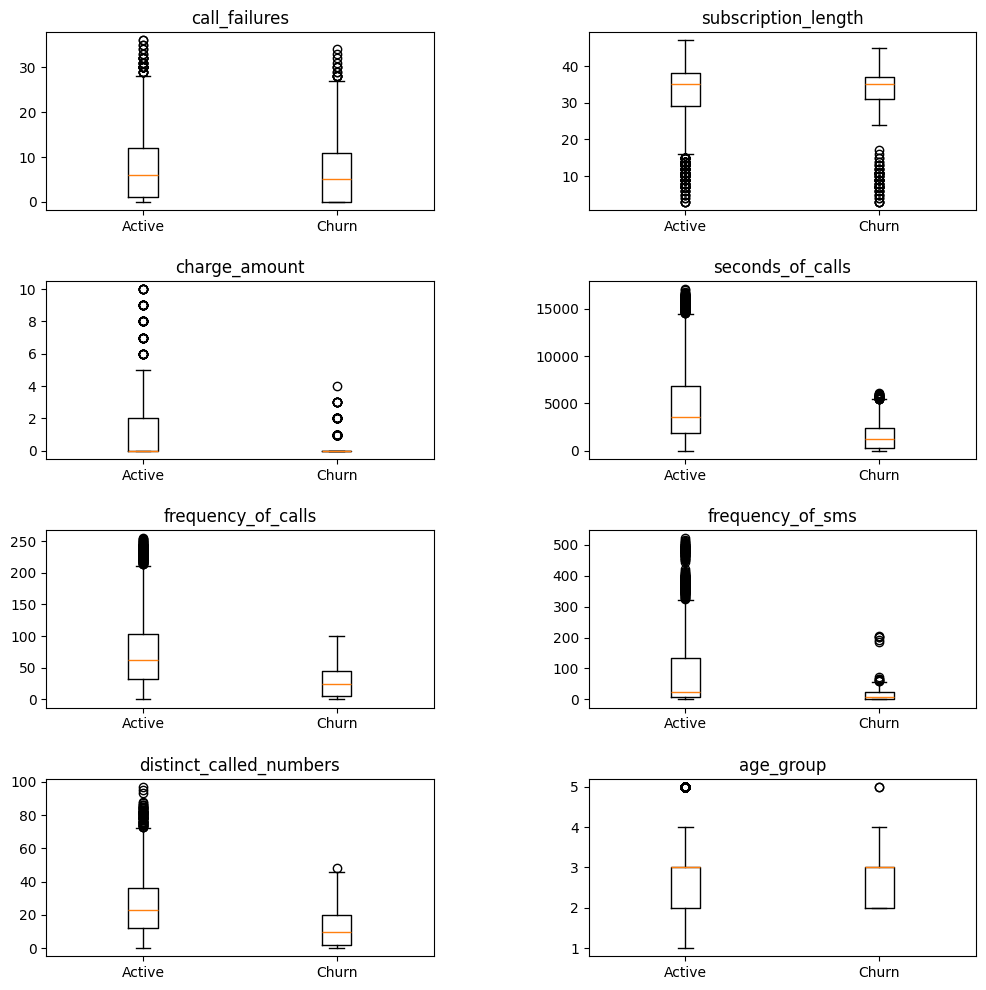

In [13]:
#Analysis of if_churn based on numeric variables
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 9):
    plt.subplot(4, 2, i)
    plt.boxplot([data.loc[data['if_churn'] == 0, data.columns[var_ind[i - 1]]],
                 data.loc[data['if_churn'] == 1, data.columns[var_ind[i - 1]]]])
    plt.title(data.columns[var_ind[i - 1]])
    plt.xticks(ticks = [1, 2], labels = ['Active', 'Churn'])

In [14]:
#Correlation analysis
corr_table = round(data.iloc[:, var_ind].corr(method = 'pearson'), 2)
corr_table

,call_failures,subscription_length,charge_amount,seconds_of_calls,frequency_of_calls,frequency_of_sms,distinct_called_numbers,age_group
call_failures,1.00,0.17,0.59,0.50,0.57,-0.02,0.50,0.05
subscription_length,0.17,1.00,0.08,0.12,0.11,0.08,0.09,0.02
charge_amount,0.59,0.08,1.00,0.45,0.38,0.09,0.42,0.28
seconds_of_calls,0.50,0.12,0.45,1.00,0.95,0.10,0.68,0.02
frequency_of_calls,0.57,0.11,0.38,0.95,1.00,0.10,0.74,-0.03
frequency_of_sms,-0.02,0.08,0.09,0.10,0.10,1.00,0.08,-0.05
distinct_called_numbers,0.50,0.09,0.42,0.68,0.74,0.08,1.00,0.02
age_group,0.05,0.02,0.28,0.02,-0.03,-0.05,0.02,1.00


In [15]:
#Cross tab analysis
for i in ['if_complain', 'tariff_plan', 'status']:
    cross_tab_pct = round(pd.crosstab(data[i],
                                      data['if_churn'], 
                                      normalize = 'columns'), 2)
    print('--- cross table for if_churn vs. ' + i + ' ---')
    print(cross_tab_pct)

--- cross table for if_churn vs. if_complain ---
if_churn        0    1
if_complain           
0            0.98  0.6
1            0.02  0.4
--- cross table for if_churn vs. tariff_plan ---
if_churn        0     1
tariff_plan            
1            0.91  0.99
2            0.09  0.01
--- cross table for if_churn vs. status ---
if_churn     0     1
status              
1         0.84  0.25
2         0.16  0.75


## Data Preparation

In [16]:
#Remove id
data.drop(columns = 'id', inplace = True)

In [17]:
#Convert data type of categorical variables
data[['if_complain', 
      'tariff_plan', 
      'status']] = data[['if_complain',
                         'tariff_plan',
                         'status']].apply(lambda col: 
                                          col.astype('category'))

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   call_failures            3150 non-null   int64   
 1   if_complain              3150 non-null   category
 2   subscription_length      3150 non-null   int64   
 3   charge_amount            3150 non-null   int64   
 4   seconds_of_calls         3150 non-null   int64   
 5   frequency_of_calls       3150 non-null   int64   
 6   frequency_of_sms         3150 non-null   int64   
 7   distinct_called_numbers  3150 non-null   int64   
 8   age_group                3150 non-null   int64   
 9   tariff_plan              3150 non-null   category
 10  status                   3150 non-null   category
 11  if_churn                 3150 non-null   int64   
dtypes: category(3), int64(9)
memory usage: 231.2 KB


## Build Predictive Models

In [19]:
#Split data into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, 
                               test_size = 0.3, 
                               random_state = 1234)
print(train.shape)
print(test.shape)

(2205, 12)
(945, 12)


In [20]:
#Define dummy variables for categorical varibales
dummy_vars = pd.get_dummies(train[['if_complain', 
                                   'tariff_plan', 
                                   'status']])

#Define base level for each categorical variable
dummy_vars.drop(columns = ['if_complain_1', 
                           'tariff_plan_2', 
                           'status_2'], inplace = True)
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 1218 to 2863
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   if_complain_0  2205 non-null   bool 
 1   tariff_plan_1  2205 non-null   bool 
 2   status_1       2205 non-null   bool 
dtypes: bool(3)
memory usage: 23.7 KB


In [21]:
#Define feature matrix 
X_ = train.drop(['if_churn', 
                 'if_complain', 
                 'tariff_plan', 
                 'status'], axis = 1)
X_train_imbalanced = pd.concat([X_, dummy_vars], axis = 1)
X_train_imbalanced.head()

,call_failures,subscription_length,charge_amount,seconds_of_calls,frequency_of_calls,frequency_of_sms,distinct_called_numbers,age_group,if_complain_0,tariff_plan_1,status_1
1218,0,39,0,0,0,3,0,2,True,True,False
1430,0,34,0,6660,99,18,25,4,True,True,True
2881,3,33,0,933,7,8,5,4,True,True,False
424,11,33,1,5638,90,15,19,2,False,True,True
2338,8,25,1,1540,40,190,9,3,True,False,True


In [22]:
#Define response matrix
y_train = train['if_churn']
y_train

1218    1
1430    0
2881    1
424     1
2338    0
       ..
664     0
3125    0
1318    1
723     0
2863    0
Name: if_churn, Length: 2205, dtype: int64

### Logistic Regression

In [23]:
#Logistic regression/imbalanced data - model 1
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(penalty = None, #None: no penalty, 
                                             #'l1': L1 Regularization, 
                                             #'l2': L2 Regularization
                             random_state = 1234,
                             max_iter = 100,
                             solver = 'saga') #'lbfgs' for small sample, 
                                              #'saga' for large sample

#Fit the logistic regression on the train
model_1.fit(X_train_imbalanced, y_train)
print(model_1.coef_)
print(model_1.intercept_)
#Note: convergence problem
#Possible solutions: 
#   Increase the number of iterations
#   Try a different optimizer
#   Scale data 

[[ 5.36760759e-04 -4.96707718e-04 -3.91147322e-05 -5.29362422e-04
  -2.23650009e-04 -4.38551371e-03 -3.66574096e-04 -4.65385838e-05
  -8.36105245e-05 -9.40687027e-06 -6.32628491e-05]]
[-1.46702547e-05]


C:\Users\FarzadMinooei\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_imbalanced_scaled = scaler.fit_transform(X_train_imbalanced)

In [25]:
#Logistic regression/imbalanced data - model 1
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(penalty = None, #None: no penalty, 
                                             #'l1': L1 Regularization, 
                                             #'l2': L2 Regularization
                             random_state = 1234,
                             max_iter = 2000,
                             solver = 'saga') #'lbfgs' for small sample, 
                                              #'saga' for large sample

#Fit the logistic regression on the train
model_1.fit(X_train_imbalanced_scaled, y_train)
print(model_1.coef_)
print(model_1.intercept_)

[[ 0.97962014 -0.35494426 -0.86055128  1.59479456 -3.10769775 -1.32347678
  -0.17350959 -0.06240147 -1.03074587 -0.16990688 -0.5559783 ]]
[-3.53242923]


In [26]:
#Predict probability in the train
y_train_prob_1 = model_1.predict_proba(X_train_imbalanced_scaled)
y_train_prob_1

array([[6.27184391e-01, 3.72815609e-01],
       [9.92808341e-01, 7.19165941e-03],
       [5.34857000e-01, 4.65143000e-01],
       ...,
       [6.59610575e-01, 3.40389425e-01],
       [9.90088778e-01, 9.91122173e-03],
       [9.99244122e-01, 7.55878000e-04]], shape=(2205, 2))

In [27]:
#Plot ROC curve
from sklearn.metrics import roc_curve, auc
def roc_plot(response, pred_prob):
    #Calculate false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(response, pred_prob)
    #Calculate area under curve
    print('Area under the ROC curve : {r: 0.3f}'.format(r = auc(fpr, tpr)))
    #Plot ROC curve
    plt.plot(fpr, tpr, c = 'red', linewidth = 2)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    return plt.show()

Area under the ROC curve :  0.935


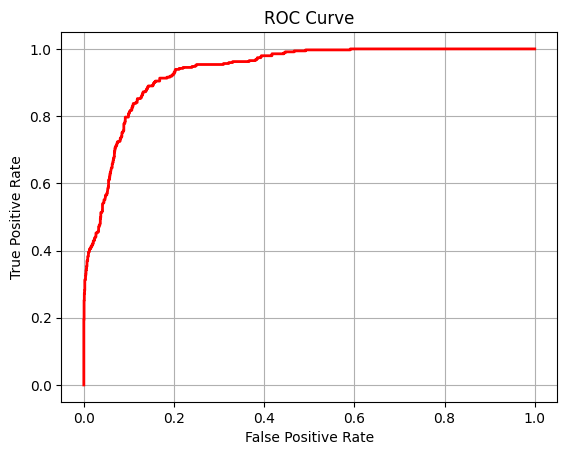

In [28]:
#Plot ROC curve - model 1
roc_plot(y_train, y_train_prob_1[:, 1])

In [29]:
#Youden’s index for optimal cut-off probability 
def find_optimal_cutoff(response, pred_prob):
    #Calculate false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(response, pred_prob)
    #Calculate the optimal cut-off
    cutoff = thresholds[np.argmax(tpr - fpr)]
    return round(cutoff, 3)

In [30]:
#Find the optimal cut-off
cutoff_1 = find_optimal_cutoff(y_train, y_train_prob_1[:, 1])
cutoff_1

np.float64(0.192)

In [31]:
#Predict class on train
y_train_pred_1 = pd.Series([1 if _ > cutoff_1 else 0 for _ in y_train_prob_1[:, 1]], 
                           index = y_train.index)
y_train_pred_1

1218    1
1430    0
2881    1
424     1
2338    0
       ..
664     0
3125    0
1318    1
723     0
2863    0
Length: 2205, dtype: int64

In [32]:
#Prediction evaluation on train
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
print('Accuracy is {r: 0.3f}'.format(r = accuracy_score(y_train, y_train_pred_1)))
print('Precision is {r: 0.3f}'.format(r = precision_score(y_train, y_train_pred_1)))
print('Recall is {r: 0.5f}'.format(r = recall_score(y_train, y_train_pred_1)))
#If both false positive and false negatives are equally important, 
# use F1 score
print('F1 score is {r: 0.3f}'.format(r = f1_score(y_train, y_train_pred_1)))
#If false negatives are more costly, use F2 score, 
# otherwise, if false positives are more costly, then use F0.5 score.
print('F2 score is {r: 0.3f}'.format(r = fbeta_score(y_train, y_train_pred_1, beta = 2)))
print('--- Confusion Matrix ---')
print(confusion_matrix(y_train, y_train_pred_1))

Accuracy is  0.862
Precision is  0.536
Recall is  0.88986
F1 score is  0.669
F2 score is  0.786
--- Confusion Matrix ---
[[1594  266]
 [  38  307]]


In [33]:
#Predict on test - model 1

#Define dummy variables for categorical varibales
dummy_vars = pd.get_dummies(test[['if_complain', 
                                  'tariff_plan', 
                                  'status']])

#Define base level for each categorical variable
dummy_vars.drop(columns = ['if_complain_1', 
                           'tariff_plan_2', 
                           'status_2'], inplace = True)

#Define feature matrix 
X_ = test.drop(['if_churn', 
                'if_complain', 
                'tariff_plan', 
                'status'], axis = 1)
X_test = pd.concat([X_, dummy_vars], axis = 1)

#Scale data
X_test_scaled = scaler.transform(X_test)

#Predict probability in the test
y_test_prob_1 = model_1.predict_proba(X_test_scaled)

#Predict class in the test
y_test_pred_1 = pd.Series([1 if _ > cutoff_1 else 0 for _ in y_test_prob_1[:, 1]],
                          index = test.index)
y_test_pred_1

358     0
775     1
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     0
1879    0
Length: 945, dtype: int64

In [34]:
#Model evaluation on test - model 1
models_comp = pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                       y_test_pred_1),
                            'Precision': precision_score(test['if_churn'], 
                                                         y_test_pred_1),
                            'Recall': recall_score(test['if_churn'], 
                                                   y_test_pred_1),
                            'F1 Score': f1_score(test['if_churn'], 
                                                 y_test_pred_1),
                            'F2 Score': fbeta_score(test['if_churn'], 
                                                    y_test_pred_1, beta = 2)
                            }, 
                            index = ['LogReg - Imbalanced - All Features'])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg - Imbalanced - All Features,0.863492,0.544681,0.853333,0.664935,0.766467


In [35]:
#Confusion matrix - model 1
confusion_matrix(test['if_churn'], y_test_pred_1)

array([[688, 107],
       [ 22, 128]])

In [36]:
#pip install imblearn
import imblearn
print(imblearn.__version__)

0.14.0


In [37]:
#Define oversampling strategy
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'minority')

#Fit and apply the transform
X_train_over_scaled, y_train_over = oversample.fit_resample(X_train_imbalanced_scaled, 
                                                            y_train)

In [38]:
y_train_over.value_counts()

if_churn
1    1860
0    1860
Name: count, dtype: int64

In [39]:
#Feature selection
from sklearn.feature_selection import RFECV
rfe = RFECV(LogisticRegression(), cv = 10, scoring = 'roc_auc')
rfe.fit(X_train_over_scaled, y_train_over)
print(rfe.support_)

[ True  True  True  True  True  True  True False  True False  True]


In [40]:
#Selected features indices
selected_features_ind = np.where(rfe.support_)
selected_features_ind

(array([ 0,  1,  2,  3,  4,  5,  6,  8, 10]),)

In [41]:
X_train_imbalanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 1218 to 2863
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   call_failures            2205 non-null   int64
 1   subscription_length      2205 non-null   int64
 2   charge_amount            2205 non-null   int64
 3   seconds_of_calls         2205 non-null   int64
 4   frequency_of_calls       2205 non-null   int64
 5   frequency_of_sms         2205 non-null   int64
 6   distinct_called_numbers  2205 non-null   int64
 7   age_group                2205 non-null   int64
 8   if_complain_0            2205 non-null   bool 
 9   tariff_plan_1            2205 non-null   bool 
 10  status_1                 2205 non-null   bool 
dtypes: bool(3), int64(8)
memory usage: 161.5 KB


In [42]:
#Logistic regression w/ oversampling & feature selection - model 2
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression(penalty = None, #None: no penalty, 
                                             #'l1': L1 Regularization, 
                                             #'l2': L2 Regularization
                             random_state = 1234,
                             max_iter = 100,
                             solver = 'saga') #'lbfgs' for small sample, 
                                              #'saga' for large sample

#Fit the logistic regression on the train
model_2.fit(X_train_over_scaled[:, selected_features_ind[0]], y_train_over)
print(model_2.coef_)
print(model_2.intercept_)

[[ 1.09514751 -0.44288093 -0.88413905  1.18890888 -2.39035402 -1.41561499
  -0.39672402 -1.11042667 -0.6926485 ]]
[-1.92249904]


In [43]:
#Predict probability in the train
y_train_prob_2 = model_2.predict_proba(X_train_over_scaled[:, selected_features_ind[0]])

#Find the optimal cut-off
cutoff_2 = find_optimal_cutoff(y_train_over, y_train_prob_2[:, 1])
cutoff_2

np.float64(0.538)

In [44]:
#Predict probability in the test
y_test_prob_2 = model_2.predict_proba(X_test_scaled[:, selected_features_ind[0]])

#Predict class in the test
y_test_pred_2 = pd.Series([1 if _ > cutoff_2 else 0 for _ in y_test_prob_2[:, 1]],
                          index = test.index)
y_test_pred_2

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     1
1879    0
Length: 945, dtype: int64

In [45]:
#Model evaluation on test - model 2
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_2),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_2),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_2),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_2),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_2, beta = 2)
                                      }, 
                                      index = ['LogReg - Oversampling - Selected Features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg - Imbalanced - All Features,0.863492,0.544681,0.853333,0.664935,0.766467
LogReg - Oversampling - Selected Features,0.863492,0.544304,0.860000,0.666667,0.770609


In [46]:
#Confusion matrix - model 2
confusion_matrix(test['if_churn'], y_test_pred_2)

array([[687, 108],
       [ 21, 129]])

In [47]:
#Define undersampling strategy
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy = 'majority')

#Fit and apply the transform
X_train_under_scaled, y_train_under = undersample.fit_resample(X_train_imbalanced_scaled, 
                                                               y_train)

#Feature selection
from sklearn.feature_selection import RFECV
rfe = RFECV(LogisticRegression(), cv = 10, scoring = 'roc_auc')
rfe.fit(X_train_under_scaled, y_train_under)

#Selected features indices
selected_features_ind = np.where(rfe.support_)

#Logistic regression w/ undersampling & feature selection - model 3
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression(penalty = None, #None: no penalty, 
                                             #'l1': L1 Regularization, 
                                             #'l2': L2 Regularization
                             random_state = 1234,
                             max_iter = 500,
                             solver = 'saga') #'lbfgs' for small sample, 
                                              #'saga' for large sample

#Fit the logistic regression on the train
model_3.fit(X_train_under_scaled[:, selected_features_ind[0]], y_train_under)
print(model_3.coef_)
print(model_3.intercept_)

[[ 0.92954532 -0.39140322 -0.52185432 -1.29114263 -1.44900694 -0.3754409
  -1.34603074 -0.77441038]]
[-1.90328702]


In [48]:
#Predict probability in the train
y_train_prob_3 = model_3.predict_proba(X_train_under_scaled[:, selected_features_ind[0]])

#Find the optimal cut-off
cutoff_3 = find_optimal_cutoff(y_train_under, y_train_prob_3[:, 1])
cutoff_3

np.float64(0.463)

In [49]:
#Predict probability in the test
y_test_prob_3 = model_3.predict_proba(X_test_scaled[:, selected_features_ind[0]])

#Predict class on test
y_test_pred_3 = pd.Series([1 if _ > cutoff_3 else 0 for _ in y_test_prob_3[:, 1]],
                          index = test.index)
y_test_pred_3

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     1
636     1
1879    0
Length: 945, dtype: int64

In [50]:
#Model evaluation on test - model 3
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_3),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_3),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_3),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_3),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_3, beta = 2)
                                      }, 
                                      index = ['LogReg - Undersampling - Selected Features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg - Imbalanced - All Features,0.863492,0.544681,0.853333,0.664935,0.766467
LogReg - Oversampling - Selected Features,0.863492,0.544304,0.860000,0.666667,0.770609
LogReg - Undersampling - Selected Features,0.839153,0.496241,0.880000,0.634615,0.762125


In [51]:
#Confusion matrix - model 3
confusion_matrix(test['if_churn'], y_test_pred_3)

array([[661, 134],
       [ 18, 132]])

### Logistic Regression w/ Regularization

In [52]:
#Create hyper-parameters grid
import itertools
penalty = ['l1', 'l2']
#C: Inverse of regularization strength; 
#  smaller values specify stronger regularization.
c_reg = 10 ** np.linspace(-3, 3, 20)
params_grid = list(itertools.product(penalty, c_reg))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 41), 
                           columns = ['penalty', 'c_reg'])
params_grid

,penalty,c_reg
1,l1,0.001000
2,l1,0.002069
3,l1,0.004281
4,l1,0.008859
5,l1,0.018330
6,l1,0.037927
7,l1,0.078476
8,l1,0.162378
9,l1,0.335982
10,l1,0.695193


In [53]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_scores = np.zeros(shape = len(params_grid)) #to save cv results

import time #to measure the processing time
start_time = time.time()
for i in range(len(params_grid)):
    log_reg = LogisticRegression(penalty = params_grid.iloc[i, 0],
                                 C = params_grid.iloc[i, 1],
                                 max_iter = 100,
                                 solver = 'saga')
    scores = cross_val_score(estimator = log_reg, 
                             X = X_train_under_scaled, 
                             y = y_train_under,
                             scoring = 'roc_auc',
                             cv = 10, n_jobs = -1)
    cv_scores[i] = scores.mean()
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  4.510782718658447 seconds


In [54]:
#Best model
params_grid.iloc[np.argmax(cv_scores), :]

penalty          l1
c_reg      6.158482
Name: 13, dtype: object

In [55]:
#Train model 4
#Fit the logistic regression on the train
model_4 = LogisticRegression(penalty = params_grid.iloc[np.argmax(cv_scores), 0],
                             C = params_grid.iloc[np.argmax(cv_scores), 1],
                             random_state = 1234,
                             max_iter = 500,
                             solver = 'saga')
model_4.fit(X_train_under_scaled, y_train_under)
print(model_4.coef_)
print(model_4.intercept_)

[[ 0.93536805 -0.38959047 -0.55450235  0.35569954 -1.57574192 -1.3755341
  -0.37686144  0.         -1.3322735   0.         -0.77975214]]
[-1.8521268]


In [56]:
#Predict probability in the train
y_train_prob_4 = model_4.predict_proba(X_train_under_scaled)

#Find the optimal cut-off
cutoff_4 = find_optimal_cutoff(y_train_under, y_train_prob_4[:, 1])
cutoff_4

np.float64(0.457)

In [57]:
#Predict probability in the test
y_test_prob_4 = model_4.predict_proba(X_test_scaled)

#Predict class on test
y_test_pred_4 = pd.Series([1 if _ > cutoff_4 else 0 for _ in y_test_prob_4[:, 1]],
                          index = test.index)
y_test_pred_4

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     1
636     1
1879    0
Length: 945, dtype: int64

In [58]:
#Model evaluation on test - model 4
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_4),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_4),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_4),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_4),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_4, beta = 2)
                                      }, 
                                      index = ['LogReg - Undersampling-w/ Regularization'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg - Imbalanced - All Features,0.863492,0.544681,0.853333,0.664935,0.766467
LogReg - Oversampling - Selected Features,0.863492,0.544304,0.860000,0.666667,0.770609
LogReg - Undersampling - Selected Features,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Undersampling-w/ Regularization,0.839153,0.496241,0.880000,0.634615,0.762125


In [59]:
#Confusion matrix - model 4
confusion_matrix(test['if_churn'], y_test_pred_4)

array([[661, 134],
       [ 18, 132]])

In [60]:
#Logistic regression/imbalanced data - model 5
from sklearn.linear_model import LogisticRegression
model_5 = LogisticRegression(penalty = None, #None: no penalty, 
                                             #'l1': L1 Regularization, 
                                             #'l2': L2 Regularization
                             random_state = 1234,
                             class_weight = 'balanced',
                             max_iter = 200,
                             solver = 'saga')#'lbfgs' for small sample, 
                                             #'saga' for large sample

#Fit the logistic regression on the train
model_5.fit(X_train_imbalanced_scaled, y_train)
print(model_1.coef_)
print(model_1.intercept_)

[[ 0.97962014 -0.35494426 -0.86055128  1.59479456 -3.10769775 -1.32347678
  -0.17350959 -0.06240147 -1.03074587 -0.16990688 -0.5559783 ]]
[-3.53242923]


In [61]:
#Predict probability in the train
y_train_prob_5 = model_5.predict_proba(X_train_imbalanced_scaled)

#Find the optimal cut-off
cutoff_5 = find_optimal_cutoff(y_train, y_train_prob_5[:, 1])
cutoff_5

np.float64(0.564)

In [62]:
#Predict probability in the test
y_test_prob_5 = model_5.predict_proba(X_test_scaled)

#Predict class in the test
y_test_pred_5 = pd.Series([1 if _ > cutoff_5 else 0 for _ in y_test_prob_5[:, 1]],
                          index = test.index)
y_test_pred_5

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     0
1879    0
Length: 945, dtype: int64

In [63]:
#Model evaluation on test - model 5
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_5),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_5),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_5),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_5),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_5, beta = 2)
                                      }, 
                                      index = ['LogReg - Class Weight - All Features'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg - Imbalanced - All Features,0.863492,0.544681,0.853333,0.664935,0.766467
LogReg - Oversampling - Selected Features,0.863492,0.544304,0.860000,0.666667,0.770609
LogReg - Undersampling - Selected Features,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Undersampling-w/ Regularization,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Class Weight - All Features,0.865608,0.549356,0.853333,0.668407,0.768307


In [64]:
#Confusion matrix - model 5
confusion_matrix(test['if_churn'], y_test_pred_5)

array([[690, 105],
       [ 22, 128]])

### kNN Classifier

In [65]:
#pip install gower
import gower

In [66]:
#Calculate distance matrix based on Gower distance
train_dist_matrix = gower.gower_matrix(X_train_over_scaled, 
                                       cat_features = [False] * 8 + [True] * 3)
print(X_train_over_scaled.shape)
print(train_dist_matrix.shape)

(3720, 11)
(3720, 3720)


In [67]:
#kNN classifier/Oversampling data - model 6
from sklearn.neighbors import KNeighborsClassifier
model_6 = KNeighborsClassifier(n_neighbors = 9, 
                               weights = 'uniform',
                               algorithm = 'auto',  
                               metric = 'precomputed')

#Fit the kNN classifier on the train
model_6.fit(train_dist_matrix, y_train_over)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'precomputed'
,metric_params,None
,n_jobs,None


In [68]:
#Calculate distance matrix based on Gower distance
test_train_dist_matrix = gower.gower_matrix(X_test_scaled,
                                            X_train_over_scaled,
                                            cat_features = [False] * 8 + [True] * 3)
print(X_train_over_scaled.shape)
print(X_test_scaled.shape)
print(test_train_dist_matrix.shape)

(3720, 11)
(945, 11)
(945, 3720)


In [69]:
#Predict class in the test
y_test_pred_6 = pd.Series(model_6.predict(test_train_dist_matrix), index = test.index)
y_test_pred_6

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     1
1879    0
Length: 945, dtype: int64

In [70]:
#Model evaluation on test - model 6
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_6),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_6),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_6),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_6),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_6, beta = 2)
                                      }, 
                                      index = ['kNN - Oversampling - Not Tuned'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg - Imbalanced - All Features,0.863492,0.544681,0.853333,0.664935,0.766467
LogReg - Oversampling - Selected Features,0.863492,0.544304,0.860000,0.666667,0.770609
LogReg - Undersampling - Selected Features,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Undersampling-w/ Regularization,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Class Weight - All Features,0.865608,0.549356,0.853333,0.668407,0.768307
kNN - Oversampling - Not Tuned,0.941799,0.743590,0.966667,0.840580,0.911950


In [71]:
#Confusion matrix - model 6
confusion_matrix(test['if_churn'], y_test_pred_6)

array([[745,  50],
       [  5, 145]])

### Random Forest

In [72]:
#Sample Random Forest model (not tuned)
from sklearn.ensemble import RandomForestClassifier
model_7 = RandomForestClassifier(n_estimators = 200,
                                 max_features = 4, 
                                 criterion = 'gini',
                                 max_depth = 10, 
                                 min_samples_leaf = 15, 
                                 ccp_alpha = 0,
                                 class_weight = 'balanced',
                                 random_state = 1234)

#Fit the random forest classifier on the train
model_7.fit(X_train_imbalanced, y_train)

#Predict class in the test
y_test_pred_7 = pd.Series(model_7.predict(X_test), index = test.index)
y_test_pred_7

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     1
1879    0
Length: 945, dtype: int64

In [73]:
#Model evaluation on test - model 7
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_7),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_7),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_7),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_7),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_7, beta = 2)
                                      }, 
                                      index = ['Random Forest - Class Weight - Not Tuned'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg - Imbalanced - All Features,0.863492,0.544681,0.853333,0.664935,0.766467
LogReg - Oversampling - Selected Features,0.863492,0.544304,0.860000,0.666667,0.770609
LogReg - Undersampling - Selected Features,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Undersampling-w/ Regularization,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Class Weight - All Features,0.865608,0.549356,0.853333,0.668407,0.768307
kNN - Oversampling - Not Tuned,0.941799,0.743590,0.966667,0.840580,0.911950
Random Forest - Class Weight - Not Tuned,0.918519,0.689119,0.886667,0.775510,0.838588


In [74]:
#Confusion matrix - model 7
confusion_matrix(test['if_churn'], y_test_pred_7)

array([[735,  60],
       [ 17, 133]])

In [75]:
#Create hyper-parameters grid
import itertools
n_estimators = [200, 500]
max_features = ['sqrt', 'log2', None] #If None or 1.0, then max_features = n_features
max_depth = [5, 15]
min_samples_leaf = [5, 15]
params_grid = list(itertools.product(n_estimators, 
                                     max_features, 
                                     max_depth, 
                                     min_samples_leaf))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 25), 
                           columns = ['n_estimators', 
                                      'max_features', 
                                      'max_depth', 
                                      'min_samples_leaf'])
params_grid

,n_estimators,max_features,max_depth,min_samples_leaf
1,200,sqrt,5,5
2,200,sqrt,5,15
3,200,sqrt,15,5
4,200,sqrt,15,15
5,200,log2,5,5
6,200,log2,5,15
7,200,log2,15,5
8,200,log2,15,15
9,200,None,5,5
10,200,None,5,15


In [76]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_scores = np.zeros(shape = len(params_grid)) #to save cv results

import time #to measure the processing time
start_time = time.time()
for i in range(len(params_grid)):
    rf_classifier = RandomForestClassifier(n_estimators = params_grid.iloc[i, 0],
                                           max_features = params_grid.iloc[i, 1], 
                                           criterion = 'gini',
                                           max_depth = params_grid.iloc[i, 2], 
                                           min_samples_leaf = params_grid.iloc[i, 3],
                                           class_weight = 'balanced',
                                           ccp_alpha = 0)
    scores = cross_val_score(estimator = rf_classifier, 
                             X = X_train_imbalanced, 
                             y = y_train,
                             scoring = 'roc_auc',
                             cv = 5, n_jobs = -1)
    cv_scores[i] = scores.mean()
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  19.499706983566284 seconds


In [77]:
#Best model
params_grid.iloc[np.argmax(cv_scores), :]

n_estimators         500
max_features        sqrt
max_depth             15
min_samples_leaf       5
Name: 15, dtype: object

In [78]:
#Train model 8
model_8 = RandomForestClassifier(n_estimators = params_grid.iloc[np.argmax(cv_scores), 0],
                                 max_features = params_grid.iloc[np.argmax(cv_scores), 1], 
                                 criterion = 'gini',
                                 max_depth = params_grid.iloc[np.argmax(cv_scores), 2], 
                                 min_samples_leaf = params_grid.iloc[np.argmax(cv_scores), 3], 
                                 class_weight = 'balanced',
                                 ccp_alpha = 0,
                                 random_state = 1234)

#Fit the lrandom forest classifier on the train
model_8.fit(X_train_imbalanced, y_train)

#Predict class in the test
y_test_pred_8 = pd.Series(model_8.predict(X_test), index = test.index)
y_test_pred_8

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     0
1879    0
Length: 945, dtype: int64

In [79]:
#Model evaluation in the test - model 8
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_8),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_8),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_8),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_8),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_8, beta = 2)
                                      }, 
                                      index = ['Random Forest - Class Weight - Tuned'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg - Imbalanced - All Features,0.863492,0.544681,0.853333,0.664935,0.766467
LogReg - Oversampling - Selected Features,0.863492,0.544304,0.860000,0.666667,0.770609
LogReg - Undersampling - Selected Features,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Undersampling-w/ Regularization,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Class Weight - All Features,0.865608,0.549356,0.853333,0.668407,0.768307
kNN - Oversampling - Not Tuned,0.941799,0.743590,0.966667,0.840580,0.911950
Random Forest - Class Weight - Not Tuned,0.918519,0.689119,0.886667,0.775510,0.838588
Random Forest - Class Weight - Tuned,0.947090,0.801205,0.886667,0.841772,0.868146


In [80]:
#Confusion matrix - model 8
confusion_matrix(test['if_churn'], y_test_pred_8)

array([[762,  33],
       [ 17, 133]])

### Stochastic Gradient Boost

In [81]:
#SGB classifier (not tuned) - model 9
from sklearn.ensemble import GradientBoostingClassifier
#Create SGB regressor model
model_9 = GradientBoostingClassifier(learning_rate = 0.01, #learning rate
                                     n_estimators = 500,   #the total number of trees to fit
                                     subsample = 0.9,      #the fraction of samples to be used,  
                                                                    #if .< 1, Stochastic GB
                                     max_depth = 5,         #the maximum depth of each tree
                                     min_samples_leaf = 20, #the minimum number of observations in the leaf nodes of the trees
                                     ccp_alpha = 0, 
                                     random_state = 1234)

#Fit the SGB classifier on the train
model_9.fit(X_train_over_scaled, y_train_over)

#Predict class in the test
y_test_pred_9 = pd.Series(model_9.predict(X_test_scaled), index = test.index)
y_test_pred_9

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    0
892     0
636     1
1879    0
Length: 945, dtype: int64

In [82]:
#Model evaluation in the test - model 9
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_9),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_9),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_9),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_9),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_9, beta = 2)
                                      }, 
                                      index = ['SGB - Oversampling - Not Tuned'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg - Imbalanced - All Features,0.863492,0.544681,0.853333,0.664935,0.766467
LogReg - Oversampling - Selected Features,0.863492,0.544304,0.860000,0.666667,0.770609
LogReg - Undersampling - Selected Features,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Undersampling-w/ Regularization,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Class Weight - All Features,0.865608,0.549356,0.853333,0.668407,0.768307
kNN - Oversampling - Not Tuned,0.941799,0.743590,0.966667,0.840580,0.911950
Random Forest - Class Weight - Not Tuned,0.918519,0.689119,0.886667,0.775510,0.838588
Random Forest - Class Weight - Tuned,0.947090,0.801205,0.886667,0.841772,0.868146
SGB - Oversampling - Not Tuned,0.937566,0.769231,0.866667,0.815047,0.845254


In [83]:
#Confusion matrix - model 9
confusion_matrix(test['if_churn'], y_test_pred_9)

array([[756,  39],
       [ 20, 130]])

### Support Vector Machine 

In [84]:
from sklearn.svm import SVC
#svc = SVC(kernel = 'poly', degree = 2, C = 100)
#Degree?
#C: Regularization parameter. 
#   The strength of the regularization is inversely proportional to C.

In [85]:
#Create hyper-parameters grid
degree_grid = [2, 3, 4]
#C: Inverse of regularization strength; 
#  smaller values specify stronger regularization.
c_reg = 10 ** np.linspace(-3, 3, 7)
params_grid = list(itertools.product(degree_grid, c_reg))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 22), 
                           columns = ['degree_grid', 'c_reg'])
params_grid

,degree_grid,c_reg
1,2,0.001
2,2,0.010
3,2,0.100
4,2,1.000
5,2,10.000
6,2,100.000
7,2,1000.000
8,3,0.001
9,3,0.010
10,3,0.100


In [86]:
#K-fold cross validation to choose the best model
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

cv_scores = np.zeros(shape = len(params_grid)) #to save cv results
import time #to measure the processing time
start_time = time.time()
for i in range(len(params_grid)):
    svc = SVC(kernel = 'poly', 
              degree = params_grid.iloc[i, 0], 
              C = params_grid.iloc[i, 1])
    scores = cross_val_score(svc, 
                             X = X_train_over_scaled, 
                             y = y_train_over, 
                             cv = 5, scoring = 'roc_auc')
    cv_scores[i] = scores.mean()
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  17.02814221382141 seconds


In [87]:
#Best model
params_grid.iloc[np.argmax(cv_scores), :]

degree_grid       4.0
c_reg          1000.0
Name: 21, dtype: float64

In [88]:
#Train model 10
svc = SVC(kernel = 'poly', 
          degree = params_grid.iloc[np.argmax(cv_scores), 0], 
          C = params_grid.iloc[np.argmax(cv_scores), 1])

#Fit the SVM on the train
model_10 = svc.fit(X_train_over_scaled, y_train_over)

#Predict class in the test
y_test_pred_10 = pd.Series(model_10.predict(X_test_scaled), index = test.index)
y_test_pred_10

358     0
775     0
426     1
273     0
1687    0
       ..
2505    0
1378    1
892     0
636     0
1879    0
Length: 945, dtype: int64

In [89]:
#Model evaluation in the test - model 10
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Accuracy': accuracy_score(test['if_churn'], 
                                                                  y_test_pred_10),
                                       'Precision': precision_score(test['if_churn'], 
                                                                    y_test_pred_10),
                                       'Recall': recall_score(test['if_churn'], 
                                                              y_test_pred_10),
                                       'F1 Score': f1_score(test['if_churn'], 
                                                            y_test_pred_10),
                                       'F2 Score': fbeta_score(test['if_churn'], 
                                                               y_test_pred_10, beta = 2)
                                      }, 
                                      index = ['SVM - Oversampling - Tuned'])])
models_comp

,Accuracy,Precision,Recall,F1 Score,F2 Score
LogReg - Imbalanced - All Features,0.863492,0.544681,0.853333,0.664935,0.766467
LogReg - Oversampling - Selected Features,0.863492,0.544304,0.860000,0.666667,0.770609
LogReg - Undersampling - Selected Features,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Undersampling-w/ Regularization,0.839153,0.496241,0.880000,0.634615,0.762125
LogReg - Class Weight - All Features,0.865608,0.549356,0.853333,0.668407,0.768307
kNN - Oversampling - Not Tuned,0.941799,0.743590,0.966667,0.840580,0.911950
Random Forest - Class Weight - Not Tuned,0.918519,0.689119,0.886667,0.775510,0.838588
Random Forest - Class Weight - Tuned,0.947090,0.801205,0.886667,0.841772,0.868146
SGB - Oversampling - Not Tuned,0.937566,0.769231,0.866667,0.815047,0.845254
SVM - Oversampling - Tuned,0.957672,0.802198,0.973333,0.879518,0.933504


In [90]:
#Confusion matrix - model 10
confusion_matrix(test['if_churn'], y_test_pred_10)

array([[759,  36],
       [  4, 146]])

# End of Code